In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
# from google.colab import files
# files.upload()
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download --force mrmorj/dataset-of-songs-in-spotify
# ! mv /content/dataset-of-songs-in-spotify.zip /content/gdrive/MyDrive/Spotify/
# ! unzip /content/gdrive/MyDrive/Spotify/dataset-of-songs-in-spotify.zip
# ! mv genres_v2.csv playlists.csv /content/gdrive/MyDrive/Spotify/

In [2]:
import pandas as pd
import numpy as np

# Import Dataset

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Spotify/genres_v2.csv')
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


# Data Preprocess

## Import playlist from spotify

In [4]:
import requests
import base64


TOKEN_URL = 'https://accounts.spotify.com/api/token'

CLIENT_ID = 'f011b7d5f8d7434fbd11529036a30b51'
CLIENT_SECRET = 'dd77d8a6dbf546d8bc6a17eba59ac236'

r = requests.post(
    TOKEN_URL, data={'grant_type': 'client_credentials'}, headers={'Authorization':'Basic '+ base64.urlsafe_b64encode((CLIENT_ID + ':' + CLIENT_SECRET).encode('ascii')).decode('ascii')}
)
token = r.json().get('access_token')

In [5]:
def get_playlist_tracks(playlist_id, sample, TOKEN):
    """
    Returns a list of tracks from a playlist
    """
    url = "https://api.spotify.com/v1/playlists/"+playlist_id
    headers = {"Accept": "application/json", "Content-Type": "application/json" ,'Authorization': "Bearer {}".format(TOKEN)}
    r = requests.get(url, headers=headers)
    r = r.json()

    response_df = pd.json_normalize(r['tracks']["items"])
    response_df.shape
    
    requested_tracks = ""

    for i in response_df.sample(sample)['track.id'].to_list():
        requested_tracks += i + ","

    return requested_tracks

In [6]:
def get_audio_features(track_id_list, TOKEN):
    """
    Returns a list of audio features for a list of tracks
    """

    url = "https://api.spotify.com/v1/audio-features/?ids=" + track_id_list
    headers = {"Accept": "application/json", "Content-Type": "application/json" ,'Authorization': "Bearer {}".format(TOKEN)}
    r = requests.get(url, headers=headers)
    r = r.json()
    response_df = pd.json_normalize(r['audio_features'])
    tracks = []
    artists = []
    for track in response_df.iloc:
      url_track = track['track_href']
      r = requests.get(url_track, headers=headers)
      artist = r.json()['album']['artists'][0]['name']
      title = r.json()['name']
      artists.append(artist)
      tracks.append(title)
    artists = pd.DataFrame(artists)
    tracks = pd.DataFrame(tracks)
    response_df['artist'] = artists
    response_df['track'] = tracks
    return response_df



In [7]:
# number tracks to get
sample = 47
# playlist id
playlist_id = "2u6s548LNjMtNMkJcn8Xze"

# get tracks from playlist
req_tracks = get_playlist_tracks(playlist_id, sample, token)
# get audio features for tracks
mix = get_audio_features(req_tracks, token)

In [8]:
mix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,track
0,0.485,0.4760,9,-8.241,0,0.0323,0.809000,0.000010,0.0645,0.1680,138.719,audio_features,2Uc2qwc3psj1xsCqaJ5IRk,spotify:track:2Uc2qwc3psj1xsCqaJ5IRk,https://api.spotify.com/v1/tracks/2Uc2qwc3psj1...,https://api.spotify.com/v1/audio-analysis/2Uc2...,229336,4,Daal Band,Dancing My Song
1,0.620,0.5740,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.3570,100.023,audio_features,5tz69p7tJuGPeMGwNTxYuV,spotify:track:5tz69p7tJuGPeMGwNTxYuV,https://api.spotify.com/v1/tracks/5tz69p7tJuGP...,https://api.spotify.com/v1/audio-analysis/5tz6...,250173,4,Logic,1-800-273-8255
2,0.620,0.3350,0,-9.569,0,0.0481,0.753000,0.000000,0.0577,0.4420,115.056,audio_features,5Wcypq3dylLYGfWH13SvjX,spotify:track:5Wcypq3dylLYGfWH13SvjX,https://api.spotify.com/v1/tracks/5Wcypq3dylLY...,https://api.spotify.com/v1/audio-analysis/5Wcy...,254015,4,Sogand,Shekayat
3,0.949,0.9270,5,-5.559,0,0.1170,0.467000,0.000000,0.1360,0.9230,119.001,audio_features,475NVTXMFP3MZVi3tsh5Gc,spotify:track:475NVTXMFP3MZVi3tsh5Gc,https://api.spotify.com/v1/tracks/475NVTXMFP3M...,https://api.spotify.com/v1/audio-analysis/475N...,245891,3,Reza Pishro,Kalafegi
4,0.683,0.5850,8,-6.760,1,0.0323,0.008190,0.016200,0.0797,0.6410,115.997,audio_features,0It6VJoMAare1zdV2wxqZq,spotify:track:0It6VJoMAare1zdV2wxqZq,https://api.spotify.com/v1/tracks/0It6VJoMAare...,https://api.spotify.com/v1/audio-analysis/0It6...,235000,4,Muse,Undisclosed Desires
5,0.845,0.6820,4,-6.798,0,0.1210,0.259000,0.000010,0.0843,0.3810,122.007,audio_features,1jIrQAzc6xwzw3Id6bQySk,spotify:track:1jIrQAzc6xwzw3Id6bQySk,https://api.spotify.com/v1/tracks/1jIrQAzc6xwz...,https://api.spotify.com/v1/audio-analysis/1jIr...,165787,4,Sepehr Khalse,Yakuza
6,0.581,0.5730,4,-5.360,0,0.1880,0.438000,0.000000,0.2350,0.3460,155.745,audio_features,1spw2ucp8xgS7KrmIx6Ph0,spotify:track:1spw2ucp8xgS7KrmIx6Ph0,https://api.spotify.com/v1/tracks/1spw2ucp8xgS...,https://api.spotify.com/v1/audio-analysis/1spw...,187141,4,Masih,Darya
7,0.862,0.6160,9,-5.403,0,0.1940,0.231000,0.000000,0.1620,0.9620,96.031,audio_features,0Z6k3IM5yzUVReWixzOajN,spotify:track:0Z6k3IM5yzUVReWixzOajN,https://api.spotify.com/v1/tracks/0Z6k3IM5yzUV...,https://api.spotify.com/v1/audio-analysis/0Z6k...,225123,4,Behzad Leito,Naab
8,0.661,0.6940,9,-7.049,0,0.1580,0.289000,0.000000,0.1650,0.7980,119.985,audio_features,6iB6yhsUzNJiP9sTUx0uJJ,spotify:track:6iB6yhsUzNJiP9sTUx0uJJ,https://api.spotify.com/v1/tracks/6iB6yhsUzNJi...,https://api.spotify.com/v1/audio-analysis/6iB6...,260153,4,Sepehr Khalse,Jumong (Remix)
9,0.656,0.8040,8,-4.859,0,0.0797,0.438000,0.000000,0.1890,0.6580,116.915,audio_features,6kEYgBt0uhMp2oXBhuJ150,spotify:track:6kEYgBt0uhMp2oXBhuJ150,https://api.spotify.com/v1/tracks/6kEYgBt0uhMp...,https://api.spotify.com/v1/audio-analysis/6kEY...,192888,4,Shadmehr Aghili,Bi Ehsas


In [9]:
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


## Drop Useless features

In [10]:
mix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,track
0,0.485,0.4760,9,-8.241,0,0.0323,0.809000,0.000010,0.0645,0.1680,138.719,audio_features,2Uc2qwc3psj1xsCqaJ5IRk,spotify:track:2Uc2qwc3psj1xsCqaJ5IRk,https://api.spotify.com/v1/tracks/2Uc2qwc3psj1...,https://api.spotify.com/v1/audio-analysis/2Uc2...,229336,4,Daal Band,Dancing My Song
1,0.620,0.5740,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.3570,100.023,audio_features,5tz69p7tJuGPeMGwNTxYuV,spotify:track:5tz69p7tJuGPeMGwNTxYuV,https://api.spotify.com/v1/tracks/5tz69p7tJuGP...,https://api.spotify.com/v1/audio-analysis/5tz6...,250173,4,Logic,1-800-273-8255
2,0.620,0.3350,0,-9.569,0,0.0481,0.753000,0.000000,0.0577,0.4420,115.056,audio_features,5Wcypq3dylLYGfWH13SvjX,spotify:track:5Wcypq3dylLYGfWH13SvjX,https://api.spotify.com/v1/tracks/5Wcypq3dylLY...,https://api.spotify.com/v1/audio-analysis/5Wcy...,254015,4,Sogand,Shekayat
3,0.949,0.9270,5,-5.559,0,0.1170,0.467000,0.000000,0.1360,0.9230,119.001,audio_features,475NVTXMFP3MZVi3tsh5Gc,spotify:track:475NVTXMFP3MZVi3tsh5Gc,https://api.spotify.com/v1/tracks/475NVTXMFP3M...,https://api.spotify.com/v1/audio-analysis/475N...,245891,3,Reza Pishro,Kalafegi
4,0.683,0.5850,8,-6.760,1,0.0323,0.008190,0.016200,0.0797,0.6410,115.997,audio_features,0It6VJoMAare1zdV2wxqZq,spotify:track:0It6VJoMAare1zdV2wxqZq,https://api.spotify.com/v1/tracks/0It6VJoMAare...,https://api.spotify.com/v1/audio-analysis/0It6...,235000,4,Muse,Undisclosed Desires
5,0.845,0.6820,4,-6.798,0,0.1210,0.259000,0.000010,0.0843,0.3810,122.007,audio_features,1jIrQAzc6xwzw3Id6bQySk,spotify:track:1jIrQAzc6xwzw3Id6bQySk,https://api.spotify.com/v1/tracks/1jIrQAzc6xwz...,https://api.spotify.com/v1/audio-analysis/1jIr...,165787,4,Sepehr Khalse,Yakuza
6,0.581,0.5730,4,-5.360,0,0.1880,0.438000,0.000000,0.2350,0.3460,155.745,audio_features,1spw2ucp8xgS7KrmIx6Ph0,spotify:track:1spw2ucp8xgS7KrmIx6Ph0,https://api.spotify.com/v1/tracks/1spw2ucp8xgS...,https://api.spotify.com/v1/audio-analysis/1spw...,187141,4,Masih,Darya
7,0.862,0.6160,9,-5.403,0,0.1940,0.231000,0.000000,0.1620,0.9620,96.031,audio_features,0Z6k3IM5yzUVReWixzOajN,spotify:track:0Z6k3IM5yzUVReWixzOajN,https://api.spotify.com/v1/tracks/0Z6k3IM5yzUV...,https://api.spotify.com/v1/audio-analysis/0Z6k...,225123,4,Behzad Leito,Naab
8,0.661,0.6940,9,-7.049,0,0.1580,0.289000,0.000000,0.1650,0.7980,119.985,audio_features,6iB6yhsUzNJiP9sTUx0uJJ,spotify:track:6iB6yhsUzNJiP9sTUx0uJJ,https://api.spotify.com/v1/tracks/6iB6yhsUzNJi...,https://api.spotify.com/v1/audio-analysis/6iB6...,260153,4,Sepehr Khalse,Jumong (Remix)
9,0.656,0.8040,8,-4.859,0,0.0797,0.438000,0.000000,0.1890,0.6580,116.915,audio_features,6kEYgBt0uhMp2oXBhuJ150,spotify:track:6kEYgBt0uhMp2oXBhuJ150,https://api.spotify.com/v1/tracks/6kEYgBt0uhMp...,https://api.spotify.com/v1/audio-analysis/6kEY...,192888,4,Shadmehr Aghili,Bi Ehsas


In [11]:
dataset = dataset.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'genre'], axis=1)
mix = mix.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'track', 'artist'], axis=1)


In [12]:
mix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.485,0.4760,9,-8.241,0,0.0323,0.809000,0.000010,0.0645,0.1680,138.719,229336,4
1,0.620,0.5740,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.3570,100.023,250173,4
2,0.620,0.3350,0,-9.569,0,0.0481,0.753000,0.000000,0.0577,0.4420,115.056,254015,4
3,0.949,0.9270,5,-5.559,0,0.1170,0.467000,0.000000,0.1360,0.9230,119.001,245891,3
4,0.683,0.5850,8,-6.760,1,0.0323,0.008190,0.016200,0.0797,0.6410,115.997,235000,4
5,0.845,0.6820,4,-6.798,0,0.1210,0.259000,0.000010,0.0843,0.3810,122.007,165787,4
6,0.581,0.5730,4,-5.360,0,0.1880,0.438000,0.000000,0.2350,0.3460,155.745,187141,4
7,0.862,0.6160,9,-5.403,0,0.1940,0.231000,0.000000,0.1620,0.9620,96.031,225123,4
8,0.661,0.6940,9,-7.049,0,0.1580,0.289000,0.000000,0.1650,0.7980,119.985,260153,4
9,0.656,0.8040,8,-4.859,0,0.0797,0.438000,0.000000,0.1890,0.6580,116.915,192888,4


In [13]:
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,4
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,4


## Concat two data frame

In [14]:
dataset = pd.concat([dataset, mix], ignore_index=True)
dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42347,0.821,0.730,9,-6.091,1,0.1760,0.085400,0.001750,0.1080,0.5820,140.009,231429,4
42348,0.318,0.297,2,-9.352,0,0.0288,0.681000,0.117000,0.1110,0.0399,121.067,307267,4
42349,0.491,0.581,10,-5.613,1,0.1980,0.096500,0.000000,0.2150,0.1670,81.689,231788,4
42350,0.602,0.905,2,-4.046,1,0.0775,0.000202,0.064000,0.1170,0.4110,128.019,304840,4


In [15]:
# Mix data
dataset.tail(47)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42305,0.485,0.4760,9,-8.241,0,0.0323,0.809000,0.000010,0.0645,0.1680,138.719,229336,4
42306,0.620,0.5740,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.3570,100.023,250173,4
42307,0.620,0.3350,0,-9.569,0,0.0481,0.753000,0.000000,0.0577,0.4420,115.056,254015,4
42308,0.949,0.9270,5,-5.559,0,0.1170,0.467000,0.000000,0.1360,0.9230,119.001,245891,3
42309,0.683,0.5850,8,-6.760,1,0.0323,0.008190,0.016200,0.0797,0.6410,115.997,235000,4
42310,0.845,0.6820,4,-6.798,0,0.1210,0.259000,0.000010,0.0843,0.3810,122.007,165787,4
42311,0.581,0.5730,4,-5.360,0,0.1880,0.438000,0.000000,0.2350,0.3460,155.745,187141,4
42312,0.862,0.6160,9,-5.403,0,0.1940,0.231000,0.000000,0.1620,0.9620,96.031,225123,4
42313,0.661,0.6940,9,-7.049,0,0.1580,0.289000,0.000000,0.1650,0.7980,119.985,260153,4
42314,0.656,0.8040,8,-4.859,0,0.0797,0.438000,0.000000,0.1890,0.6580,116.915,192888,4


## Change features types for memory limits

In [16]:
dataset.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [17]:
for col in dataset.columns:
  if dataset[col].dtype == 'float64':
    dataset[col] = dataset[col].astype('float16')
  if dataset[col].dtype == 'int64':
    dataset[col] = dataset[col].astype('int16')
dataset.dtypes

danceability        float16
energy              float16
key                   int16
loudness            float16
mode                  int16
speechiness         float16
acousticness        float16
instrumentalness    float16
liveness            float16
valence             float16
tempo               float16
duration_ms           int16
time_signature        int16
dtype: object

## Scale Data

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = dataset.columns
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=columns).astype('float16')
dataset_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.830078,0.813965,0.181763,0.711914,1.0,0.430420,0.060547,0.013550,0.045959,0.382080,0.610352,0.400391,0.75
1,0.708984,0.492676,0.727051,0.715820,1.0,0.061432,0.405762,0.000000,0.109802,0.108704,0.351807,0.924316,0.75
2,0.850586,0.893066,0.454590,0.782715,1.0,0.042877,0.013969,0.000004,0.369873,0.021042,0.986328,0.007889,0.75
3,0.445312,0.780762,0.000000,0.784668,1.0,0.087036,0.023987,0.000000,0.105713,0.161377,0.794922,0.386963,0.50
4,0.793945,0.624023,0.181763,0.703613,1.0,0.292725,0.219727,0.000000,0.158936,0.590332,0.554688,0.381348,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42347,0.818848,0.729980,0.818359,0.747070,1.0,0.166138,0.086426,0.001770,0.099548,0.581055,0.505371,0.031342,0.75
42348,0.274170,0.296875,0.181763,0.657227,0.0,0.006596,0.689453,0.118347,0.102661,0.021851,0.388672,0.188477,0.75
42349,0.461426,0.581055,0.909180,0.759766,1.0,0.189941,0.097717,0.000000,0.209106,0.153076,0.146118,0.036804,0.75
42350,0.582031,0.904785,0.181763,0.802734,1.0,0.059387,0.000203,0.064758,0.108826,0.404785,0.431641,0.151489,0.75


# PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
dataset_4d = pd.DataFrame(pca.fit_transform(dataset_scaled))
dataset_4d

,0,1,2,3,4
0,-0.543984,-0.294157,-0.134118,0.097903,0.088770
1,-0.385522,-0.219281,0.344537,-0.424293,-0.198893
2,-0.457305,-0.147946,0.065521,0.492796,-0.350934
3,-0.570071,-0.206894,-0.366329,0.110687,-0.298394
4,-0.549269,-0.386207,-0.106232,0.114382,0.240108
...,...,...,...,...,...
42347,-0.334158,-0.134756,0.501915,0.465765,-0.318537
42348,-0.374910,-0.266175,0.490866,0.468537,0.165875
42349,0.592172,-0.445707,0.197777,0.298871,-0.023429
42350,0.499296,-0.384537,-0.147439,0.182717,0.020437


## DBSCAN

In [24]:
from sklearn.cluster import DBSCAN
from sklearn import metrics


In [ ]:
model = DBSCAN(eps=0.7, min_samples=50) # note, as above this uses default value for other parameters

# Fit the models
clm = model.fit(dataset_4d)

In [ ]:
np.unique(clm.labels_)

array([0, 1])

In [ ]:
metrics.silhouette_score(dataset_scaled, clm.labels_, metric='euclidean')

0.2971716672828408

In [ ]:
dataset_cluster = dataset.copy()
dataset_cluster['DBSCAN Clusters']=clm.labels_
dataset_cluster = dataset_cluster.sort_values(by=['DBSCAN Clusters'])

dataset_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,DBSCAN Clusters
0,0.831055,0.813965,2,-7.363281,1,0.419922,0.059814,0.013397,0.055603,0.388916,157.000,-6533,4,0
23407,0.811035,0.871094,1,-7.101562,1,0.051788,0.000222,0.936035,0.065796,0.588867,123.000,-7305,4,0
23406,0.829102,0.833984,1,-5.269531,1,0.054810,0.000042,0.889160,0.083374,0.230957,124.000,-18003,4,0
23405,0.759766,0.963867,2,-5.843750,1,0.057587,0.001820,0.700195,0.097412,0.641113,125.000,-14108,4,0
23404,0.809082,0.988770,8,-7.652344,1,0.069397,0.002359,0.933105,0.048096,0.658203,126.000,3208,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25925,0.790039,0.744141,8,-9.968750,0,0.050201,0.018097,0.878906,0.104980,0.106995,126.000,6303,3,1
8174,0.780762,0.736816,0,-8.289062,0,0.056305,0.194946,0.000000,0.144043,0.717773,135.000,-28581,4,1
25922,0.626953,0.960938,11,-8.062500,0,0.116028,0.000097,0.609863,0.111023,0.117004,134.000,8136,4,1
8169,0.815918,0.648926,10,-9.906250,0,0.435059,0.021805,0.000000,0.086426,0.187012,119.875,20766,4,1


In [ ]:
dataset_cluster['DBSCAN Clusters'].value_counts()

0    23261
1    19091
Name: DBSCAN Clusters, dtype: int64

# SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
dataset_5d = pd.DataFrame(svd.fit_transform(dataset_scaled))

dataset_5d

,0,1,2,3,4
0,1.947784,-0.528845,-0.270860,-0.101466,-0.183168
1,1.934379,-0.347404,-0.240995,0.171975,0.651035
2,2.028529,-0.421629,-0.137624,0.253496,-0.416069
3,1.676120,-0.616173,-0.127911,-0.227021,-0.139057
4,1.881946,-0.550353,-0.356117,-0.063217,-0.181470
...,...,...,...,...,...
42347,1.736019,-0.587157,-0.111342,-0.014679,-0.422158
42348,1.815097,0.651451,-0.577781,0.510842,-0.349152
42349,1.906451,0.626467,-0.574469,-0.034777,0.296275
42350,1.762444,0.607686,-0.538994,0.442376,-0.397302


## DBSCAN

In [ ]:
model = DBSCAN(eps=0.7, min_samples=50) # note, as above this uses default value for other parameters

# Fit the models
clm = model.fit(dataset_5d)

print(np.unique(clm.labels_))
print(metrics.silhouette_score(dataset_scaled, clm.labels_, metric='euclidean'))

dataset_cluster = dataset.copy()
dataset_cluster['DBSCAN Clusters']=clm.labels_
dataset_cluster = dataset_cluster.sort_values(by=['DBSCAN Clusters'])

dataset_cluster['DBSCAN Clusters'].value_counts()

[0 1]
0.2971716672828408


0    23261
1    19091
Name: DBSCAN Clusters, dtype: int64

# Feature Selection

In [19]:
dataset_3d = dataset_scaled[['acousticness', 'instrumentalness', 'speechiness', 'valence']]
dataset_3d

,acousticness,instrumentalness,speechiness,valence
0,0.060547,0.013550,0.430420,0.382080
1,0.405762,0.000000,0.061432,0.108704
2,0.013969,0.000004,0.042877,0.021042
3,0.023987,0.000000,0.087036,0.161377
4,0.219727,0.000000,0.292725,0.590332
...,...,...,...,...
42347,0.086426,0.001770,0.166138,0.581055
42348,0.689453,0.118347,0.006596,0.021851
42349,0.097717,0.000000,0.189941,0.153076
42350,0.000203,0.064758,0.059387,0.404785


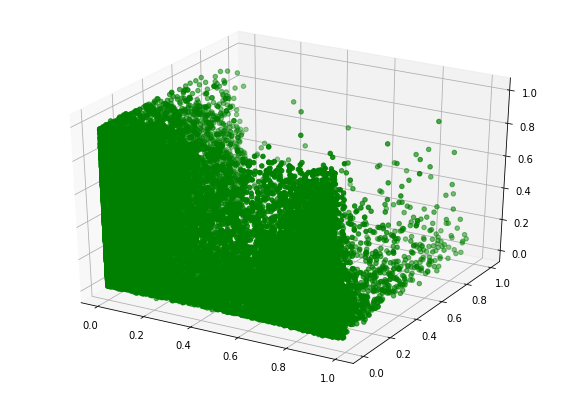

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(dataset_3d['instrumentalness'], dataset_3d['acousticness'], dataset_3d['valence'], color = "green")


## DBSCAN

In [25]:
model = DBSCAN(eps=0.06, min_samples=50) # note, as above this uses default value for other parameters

# Fit the models
clm = model.fit(dataset_3d)

print(np.unique(clm.labels_))
print(metrics.silhouette_score(dataset_scaled, clm.labels_, metric='euclidean'))

dataset_cluster = dataset.copy()
dataset_cluster['DBSCAN Clusters']=clm.labels_
dataset_cluster = dataset_cluster.sort_values(by=['DBSCAN Clusters'])

dataset_cluster['DBSCAN Clusters'].value_counts()

[-1  0]
0.05271206457860711


 0    34555
-1     7797
Name: DBSCAN Clusters, dtype: int64

## KMeans

In [25]:
from sklearn.cluster import KMeans
import numpy as np

clm = KMeans(n_clusters=10, random_state=0).fit(dataset_3d)

print(np.unique(clm.labels_))
print(metrics.silhouette_score(dataset_scaled, clm.labels_, metric='euclidean'))

dataset_cluster = dataset.copy()
dataset_cluster['kmeans Clusters']=clm.labels_


dataset_cluster['kmeans Clusters'].value_counts()

[0 1 2 3 4 5 6 7 8 9]
0.03262523746219869


9    7560
4    6642
8    6530
3    5147
1    4168
6    3781
0    2634
7    1987
2    1952
5    1951
Name: kmeans Clusters, dtype: int64

In [27]:
dataset_cluster.tail(47)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kmeans Clusters
42305,0.351074,0.295898,4,-10.109375,0,0.033295,0.934082,0.000000,0.094971,0.119995,115.3125,3578,4,2
42306,0.540039,0.330078,3,-10.757812,0,0.032410,0.611816,0.096130,0.106018,0.163940,111.8125,-6651,4,2
42307,0.743164,0.894043,9,-3.876953,0,0.038086,0.295898,0.000000,0.078430,0.642090,117.0000,-6902,4,5
42308,0.490967,0.581055,10,-5.613281,1,0.197998,0.096497,0.000000,0.214966,0.166992,81.6875,-30356,4,9
42309,0.620117,0.334961,0,-9.570312,0,0.048096,0.752930,0.000000,0.057709,0.441895,115.0625,-8129,4,2
42310,0.485107,0.476074,9,-8.242188,0,0.032288,0.809082,0.000010,0.064514,0.167969,138.7500,32728,4,2
42311,0.861816,0.616211,9,-5.402344,0,0.193970,0.230957,0.000000,0.161987,0.961914,96.0000,28515,4,3
42312,0.633789,0.735840,0,-6.863281,0,0.066223,0.770996,0.000001,0.081970,0.692871,98.0000,27590,4,5
42313,0.574219,0.624023,11,-4.667969,0,0.373047,0.481934,0.000000,0.125977,0.343994,125.2500,-30390,5,2
42314,0.908203,0.668945,7,-2.826172,1,0.073792,0.002859,0.000000,0.237061,0.662109,112.2500,28176,4,3


In [26]:
mix = get_audio_features(req_tracks, token)
mix['cluster'] = clm.labels_[-47:]
mix

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,track,cluster
0,0.485,0.4760,9,-8.241,0,0.0323,0.809000,0.000010,0.0645,0.1680,138.719,audio_features,2Uc2qwc3psj1xsCqaJ5IRk,spotify:track:2Uc2qwc3psj1xsCqaJ5IRk,https://api.spotify.com/v1/tracks/2Uc2qwc3psj1...,https://api.spotify.com/v1/audio-analysis/2Uc2...,229336,4,Daal Band,Dancing My Song,2
1,0.620,0.5740,5,-7.788,0,0.0479,0.569000,0.000000,0.1900,0.3570,100.023,audio_features,5tz69p7tJuGPeMGwNTxYuV,spotify:track:5tz69p7tJuGPeMGwNTxYuV,https://api.spotify.com/v1/tracks/5tz69p7tJuGP...,https://api.spotify.com/v1/audio-analysis/5tz6...,250173,4,Logic,1-800-273-8255,2
2,0.620,0.3350,0,-9.569,0,0.0481,0.753000,0.000000,0.0577,0.4420,115.056,audio_features,5Wcypq3dylLYGfWH13SvjX,spotify:track:5Wcypq3dylLYGfWH13SvjX,https://api.spotify.com/v1/tracks/5Wcypq3dylLY...,https://api.spotify.com/v1/audio-analysis/5Wcy...,254015,4,Sogand,Shekayat,2
3,0.949,0.9270,5,-5.559,0,0.1170,0.467000,0.000000,0.1360,0.9230,119.001,audio_features,475NVTXMFP3MZVi3tsh5Gc,spotify:track:475NVTXMFP3MZVi3tsh5Gc,https://api.spotify.com/v1/tracks/475NVTXMFP3M...,https://api.spotify.com/v1/audio-analysis/475N...,245891,3,Reza Pishro,Kalafegi,5
4,0.683,0.5850,8,-6.760,1,0.0323,0.008190,0.016200,0.0797,0.6410,115.997,audio_features,0It6VJoMAare1zdV2wxqZq,spotify:track:0It6VJoMAare1zdV2wxqZq,https://api.spotify.com/v1/tracks/0It6VJoMAare...,https://api.spotify.com/v1/audio-analysis/0It6...,235000,4,Muse,Undisclosed Desires,3
5,0.845,0.6820,4,-6.798,0,0.1210,0.259000,0.000010,0.0843,0.3810,122.007,audio_features,1jIrQAzc6xwzw3Id6bQySk,spotify:track:1jIrQAzc6xwzw3Id6bQySk,https://api.spotify.com/v1/tracks/1jIrQAzc6xwz...,https://api.spotify.com/v1/audio-analysis/1jIr...,165787,4,Sepehr Khalse,Yakuza,8
6,0.581,0.5730,4,-5.360,0,0.1880,0.438000,0.000000,0.2350,0.3460,155.745,audio_features,1spw2ucp8xgS7KrmIx6Ph0,spotify:track:1spw2ucp8xgS7KrmIx6Ph0,https://api.spotify.com/v1/tracks/1spw2ucp8xgS...,https://api.spotify.com/v1/audio-analysis/1spw...,187141,4,Masih,Darya,2
7,0.862,0.6160,9,-5.403,0,0.1940,0.231000,0.000000,0.1620,0.9620,96.031,audio_features,0Z6k3IM5yzUVReWixzOajN,spotify:track:0Z6k3IM5yzUVReWixzOajN,https://api.spotify.com/v1/tracks/0Z6k3IM5yzUV...,https://api.spotify.com/v1/audio-analysis/0Z6k...,225123,4,Behzad Leito,Naab,3
8,0.661,0.6940,9,-7.049,0,0.1580,0.289000,0.000000,0.1650,0.7980,119.985,audio_features,6iB6yhsUzNJiP9sTUx0uJJ,spotify:track:6iB6yhsUzNJiP9sTUx0uJJ,https://api.spotify.com/v1/tracks/6iB6yhsUzNJi...,https://api.spotify.com/v1/audio-analysis/6iB6...,260153,4,Sepehr Khalse,Jumong (Remix),3
9,0.656,0.8040,8,-4.859,0,0.0797,0.438000,0.000000,0.1890,0.6580,116.915,audio_features,6kEYgBt0uhMp2oXBhuJ150,spotify:track:6kEYgBt0uhMp2oXBhuJ150,https://api.spotify.com/v1/tracks/6kEYgBt0uhMp...,https://api.spotify.com/v1/audio-analysis/6kEY...,192888,4,Shadmehr Aghili,Bi Ehsas,5


In [27]:
u, count = np.unique(clm.labels_[-47:], return_counts=True)
print(u, count)
count_sort_ind = np.argsort(-count)
u[count_sort_ind]

[2 3 5 8 9] [20  5 10  9  3]


array([2, 5, 8, 3, 9], dtype=int32)

# Recommander

 

*   Mix 1: cluster 2
*   Mix 2: cluster 5
*   Mix 3: cluster 8
*   Mix 4: cluster 3
*   Mix 5: cluster 9




 
 
 

In [48]:
def recommander(cluster, k):
  mix1_cluster = dataset_cluster[dataset_cluster['kmeans Clusters'] == cluster]
  mix1 = mix1_cluster[mix1_cluster.index > 42351 - 47]
  mix1_mean = mix1.mean()

  from scipy.spatial.distance import cdist

  mix1_cluster['sort_val'] = list(map(lambda x: np.linalg.norm(mix1_mean-x), np.array(mix1_cluster)))
  recommands = []
  indexes = mix1_cluster.sort_values(by='sort_val')[:k].index

  song_dataset = pd.read_csv('/content/gdrive/MyDrive/Spotify/genres_v2.csv')
  for i in indexes:
    recommands.append(song_dataset.iloc[i])

  return recommands

print(pd.DataFrame(recommander(2, 5))['song_name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


8789                          Til I Die
20012                          Doin' Me
18165                 Dancing On My Own
13371    It's All Coming Back to Me Now
18014                            Floods
Name: song_name, dtype: object


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
mix1 = recommander(2, 5)
mix2 = recommander(5, 5)
mix3 = recommander(8, 5)
mix4 = recommander(3, 5)
mix5 = recommander(9, 5)